In [2]:
import geopandas as gpd
import numpy as np

In [15]:
gdf = gpd.read_file("/data/uscuni-ulce/boundaries_of_change/impact_boundaries.gpkg", layer="1850_languages")

In [16]:
gdf

,NAME,NOTES,geometry
0,Hungarian,None,"POLYGON ((4801118.531 2663848.455, 4804042.445..."
1,German,None,"POLYGON ((5058740.098 2889741.659, 5058057.449..."
2,German,None,"POLYGON ((4973673.33 2837077.525, 4963761.231 ..."
3,German,None,"POLYGON ((4948704.331 2918472.375, 4952431.066..."
4,Slovak,None,"POLYGON ((4926481.331 2958432.762, 4948988.617..."
5,Polish,None,"POLYGON ((4939638.943 2980727.604, 4908206.871..."
6,Ukrainian,None,"POLYGON ((5090951.478 3015083.59, 5121287.083 ..."
7,German,None,"POLYGON ((4866541.1 3563317.411, 4891394.367 3..."
8,Czech,None,"POLYGON ((4839266.468 2890177.651, 4815875.158..."
9,Slovenian,None,"POLYGON ((4767630.582 2594131.388, 4720847.962..."


In [17]:
indices = gdf.sindex.query(gdf.geometry, predicate="intersects")
left, right = np.unique(np.sort(indices, axis=0), axis=1)

mask = left == right
left = left[~mask]
right = right[~mask]
geoms = gdf.iloc[left].intersection(gdf.iloc[right], align=False)

In [18]:
left, right = np.unique(np.sort(indices, axis=0), axis=1)
indices

array([[ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  4,
         4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,
         6,  6,  6,  7,  7,  8,  8,  8,  8,  9,  9,  9, 10, 10, 11, 11,
        11, 11, 11, 11],
       [ 0,  4,  1,  6,  9,  2, 11,  0,  4,  1,  0,  4,  2,  4,  3,  0,
         4,  1,  6,  5,  2,  3,  8, 11,  4,  6,  5, 10,  8, 11,  7,  0,
         4,  6,  5,  5,  7,  4,  5,  8, 11,  0,  9, 11,  5, 10,  0,  4,
         5,  9,  8, 11]])

<Axes: >

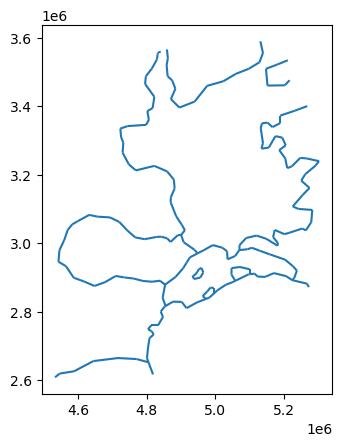

In [19]:
geoms.plot()

<Axes: >

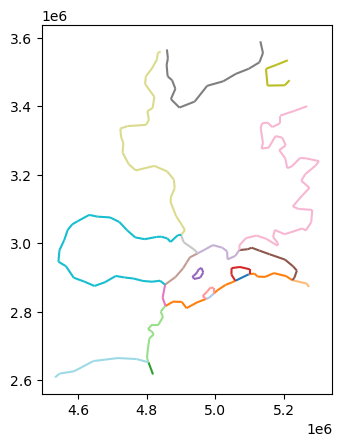

In [20]:
geoms.plot(cmap='tab20')

In [21]:
gdf

,NAME,NOTES,geometry
0,Hungarian,None,"POLYGON ((4801118.531 2663848.455, 4804042.445..."
1,German,None,"POLYGON ((5058740.098 2889741.659, 5058057.449..."
2,German,None,"POLYGON ((4973673.33 2837077.525, 4963761.231 ..."
3,German,None,"POLYGON ((4948704.331 2918472.375, 4952431.066..."
4,Slovak,None,"POLYGON ((4926481.331 2958432.762, 4948988.617..."
5,Polish,None,"POLYGON ((4939638.943 2980727.604, 4908206.871..."
6,Ukrainian,None,"POLYGON ((5090951.478 3015083.59, 5121287.083 ..."
7,German,None,"POLYGON ((4866541.1 3563317.411, 4891394.367 3..."
8,Czech,None,"POLYGON ((4839266.468 2890177.651, 4815875.158..."
9,Slovenian,None,"POLYGON ((4767630.582 2594131.388, 4720847.962..."


In [22]:
left = gdf.NAME.iloc[left]
right = gdf.NAME.iloc[right]

In [23]:
left

0     Hungarian
0     Hungarian
0     Hungarian
0     Hungarian
0     Hungarian
0     Hungarian
0     Hungarian
1        German
1        German
2        German
2        German
3        German
3        German
4        Slovak
4        Slovak
4        Slovak
4        Slovak
4        Slovak
5        Polish
5        Polish
5        Polish
5        Polish
5        Polish
5        Polish
6     Ukrainian
7        German
8         Czech
8         Czech
9     Slovenian
9     Slovenian
10      Russian
11       German
Name: NAME, dtype: object

In [24]:
right

0     Hungarian
1        German
2        German
4        Slovak
6     Ukrainian
9     Slovenian
11       German
1        German
4        Slovak
2        German
4        Slovak
3        German
4        Slovak
4        Slovak
5        Polish
6     Ukrainian
8         Czech
11       German
5        Polish
6     Ukrainian
7        German
8         Czech
10      Russian
11       German
6     Ukrainian
7        German
8         Czech
11       German
9     Slovenian
11       German
10      Russian
11       German
Name: NAME, dtype: object

In [14]:
geoms

0    MULTILINESTRING ((4470617.452 3025026.023, 447...
0    MULTILINESTRING ((4603174.085 2858273.123, 460...
0    MULTILINESTRING ((4351305.316 3476171.174, 434...
1    MULTILINESTRING ((4854633.284 2791782.465, 484...
1    MULTILINESTRING ((4630531.409 3110893.427, 463...
1    MULTILINESTRING ((4660255.78 3095529.129, 4671...
3    MULTILINESTRING ((4598483.274 3432717.975, 459...
dtype: geometry